In [255]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import numpy as np
from scipy.stats import linregress

## Scraping the Premier League match results for the 2020-21, 2021-22, 2022-23, 2023-24, and 2024-25 seasons and putting in a dataframe

In [2]:
base_url = "https://fixturedownload.com/view/json/epl-"

In [4]:
raw_matches_df = pd.DataFrame()
# looping through the websites for the premier league match results for the 20-21, 21-22, 22-23, 23-24, and 24-25 seasons
for year in range(2020,2025):
    year_url = base_url + str(year)
    year_website = requests.get(year_url)        
    soup = BeautifulSoup(year_website.content, 'html.parser')
    data = soup.find('textarea')
    data_text = data.get_text()
    curr_season_matches_df = pd.read_json(data_text)
    curr_season_matches_df['Season'] = str(year) + '-' + str(year+1) # Adding Season Column
    raw_matches_df = pd.concat([raw_matches_df, curr_season_matches_df])

C:\Users\ckgottlieb\AppData\Local\Temp\ipykernel_28964\2458789591.py:9: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  curr_season_matches_df = pd.read_json(data_text)
C:\Users\ckgottlieb\AppData\Local\Temp\ipykernel_28964\2458789591.py:9: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  curr_season_matches_df = pd.read_json(data_text)
C:\Users\ckgottlieb\AppData\Local\Temp\ipykernel_28964\2458789591.py:9: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  curr_season_matches_df = pd.read_json(data_text)
C:\Users\ckgottlieb\AppData\Local\Temp\ipykernel_28964\2458789591.py:9: FutureWarning: Passing literal json to 'read_json' i

In [5]:
'''
all_matches = []
# looping through the websites for the premier league match results for the 20-21, 21-22, 22-23, 23-24, and 24-25 seasons
for year in range(2020,2025):
    year_url = base_url + str(year)
    year_website = requests.get(year_url)        
    soup = BeautifulSoup(year_website.content, 'html.parser')
    data = soup.find('textarea')
    data_text = data.get_text()
    matches = json.loads(data_text)
    season = str(year) + '-' + str(year+1)
    for match in matches:
        match['Season'] = season
    all_matches.append(matches)
'''

"\nall_matches = []\n# looping through the websites for the premier league match results for the 20-21, 21-22, 22-23, 23-24, and 24-25 seasons\nfor year in range(2020,2025):\n    year_url = base_url + str(year)\n    year_website = requests.get(year_url)        \n    soup = BeautifulSoup(year_website.content, 'html.parser')\n    data = soup.find('textarea')\n    data_text = data.get_text()\n    matches = json.loads(data_text)\n    season = str(year) + '-' + str(year+1)\n    for match in matches:\n        match['Season'] = season\n    all_matches.append(matches)\n"

In [6]:
'''
# Right now all_matches is a list of lists of dictionaries. This converts it to a lists of dictionaries.
all_matches_collapsed = [m for season in all_matches for m in season]
'''

'\n# Right now all_matches is a list of lists of dictionaries. This converts it to a lists of dictionaries.\nall_matches_collapsed = [m for season in all_matches for m in season]\n'

In [7]:
'''
raw_matches_df = pd.DataFrame(all_matches_collapsed)
'''

'\nraw_matches_df = pd.DataFrame(all_matches_collapsed)\n'

In [8]:
raw_matches_df.head()

,MatchNumber,RoundNumber,DateUtc,Location,HomeTeam,AwayTeam,Group,HomeTeamScore,AwayTeamScore,Season
0,4,1,2020-09-12 11:30:00Z,Craven Cottage,Fulham,Arsenal,NaN,0,3,2020-2021
1,3,1,2020-09-12 14:00:00Z,Selhurst Park,Crystal Palace,Southampton,NaN,1,0,2020-2021
2,5,1,2020-09-12 16:30:00Z,Anfield,Liverpool,Leeds,NaN,4,3,2020-2021
3,8,1,2020-09-12 19:00:00Z,London Stadium,West Ham,Newcastle,NaN,0,2,2020-2021
4,7,1,2020-09-13 13:00:00Z,The Hawthorns,West Brom,Leicester,NaN,0,3,2020-2021


In [9]:
len(raw_matches_df)

1900

In [10]:
print(1900/5)

380.0


We see that there are 1900 total matches in the dataframe. We have the data for 5 seasons, so this is what we expect because there is 380 matches per season (38 weeks and 10 matches per week).

## Transforming the Dataframe

In [11]:
# Removing Group column 
raw_matches_df = raw_matches_df.drop('Group', axis = 1)

In [12]:
# Renaming RoundNumber and DateUtc to WeekNumber and Date
col_names = list(raw_matches_df.columns)
col_names[1:3] = ['WeekNumber','Date']
raw_matches_df.columns = col_names

In [13]:
# Nottingham Forest is listed like Nott'm Forest in one season so changing this to Nottingham Forest like it is named in the rest of the seasons
raw_matches_df['HomeTeam'] = raw_matches_df['HomeTeam'].replace({"Nott'm Forest": 'Nottingham Forest'})
raw_matches_df['AwayTeam'] = raw_matches_df['AwayTeam'].replace({"Nott'm Forest": 'Nottingham Forest'})

In [14]:
# Reordering columns
raw_matches_df = raw_matches_df.reindex(columns = ['WeekNumber','MatchNumber','HomeTeam','AwayTeam','HomeTeamScore','AwayTeamScore','Location','Date','Season'])

In [15]:
# Updated dataframe
raw_matches_df.head()

,WeekNumber,MatchNumber,HomeTeam,AwayTeam,HomeTeamScore,AwayTeamScore,Location,Date,Season
0,1,4,Fulham,Arsenal,0,3,Craven Cottage,2020-09-12 11:30:00Z,2020-2021
1,1,3,Crystal Palace,Southampton,1,0,Selhurst Park,2020-09-12 14:00:00Z,2020-2021
2,1,5,Liverpool,Leeds,4,3,Anfield,2020-09-12 16:30:00Z,2020-2021
3,1,8,West Ham,Newcastle,0,2,London Stadium,2020-09-12 19:00:00Z,2020-2021
4,1,7,West Brom,Leicester,0,3,The Hawthorns,2020-09-13 13:00:00Z,2020-2021


## Creating Second Dataframe where each match is represented twice - once for each time
##### * This is to keep track of momentum data for the teams

In [16]:
# First creating a dataframe of for all the home teams
home_teams_df = pd.DataFrame(raw_matches_df)

In [17]:
# Renaming columns 
col_names = list(home_teams_df.columns)
col_names[2:6] = ['Team','Opponent','TeamGoals','OpponentGoals']
home_teams_df.columns = col_names

In [18]:
# Adding Home/Away Column (all the teams in this dataframe are home)
home_teams_df['Home/Away'] = 'Home'

In [19]:
home_teams_df.head()

,WeekNumber,MatchNumber,Team,Opponent,TeamGoals,OpponentGoals,Location,Date,Season,Home/Away
0,1,4,Fulham,Arsenal,0,3,Craven Cottage,2020-09-12 11:30:00Z,2020-2021,Home
1,1,3,Crystal Palace,Southampton,1,0,Selhurst Park,2020-09-12 14:00:00Z,2020-2021,Home
2,1,5,Liverpool,Leeds,4,3,Anfield,2020-09-12 16:30:00Z,2020-2021,Home
3,1,8,West Ham,Newcastle,0,2,London Stadium,2020-09-12 19:00:00Z,2020-2021,Home
4,1,7,West Brom,Leicester,0,3,The Hawthorns,2020-09-13 13:00:00Z,2020-2021,Home


In [20]:
# Next creating a dataframe for all the away teams
away_teams_df = pd.DataFrame(raw_matches_df)

In [21]:
# Renaming the columns
col_names = list(away_teams_df.columns)
col_names[2:6] = ['Opponent','Team','OpponentGoals','TeamGoals'] # Here the HomeTeam correlates with Opponent and AwayTeam corrolates with Team
away_teams_df.columns = col_names

In [22]:
away_teams_df['Home/Away'] = 'Away'

In [23]:
away_teams_df.head()

,WeekNumber,MatchNumber,Opponent,Team,OpponentGoals,TeamGoals,Location,Date,Season,Home/Away
0,1,4,Fulham,Arsenal,0,3,Craven Cottage,2020-09-12 11:30:00Z,2020-2021,Away
1,1,3,Crystal Palace,Southampton,1,0,Selhurst Park,2020-09-12 14:00:00Z,2020-2021,Away
2,1,5,Liverpool,Leeds,4,3,Anfield,2020-09-12 16:30:00Z,2020-2021,Away
3,1,8,West Ham,Newcastle,0,2,London Stadium,2020-09-12 19:00:00Z,2020-2021,Away
4,1,7,West Brom,Leicester,0,3,The Hawthorns,2020-09-13 13:00:00Z,2020-2021,Away


In [24]:
# Combining home_teams_df and away_teams_df to create dataframe where each match is represented twice (once for each team)
df = pd.concat([home_teams_df, away_teams_df])

In [25]:
df.head()

,WeekNumber,MatchNumber,Team,Opponent,TeamGoals,OpponentGoals,Location,Date,Season,Home/Away
0,1,4,Fulham,Arsenal,0,3,Craven Cottage,2020-09-12 11:30:00Z,2020-2021,Home
1,1,3,Crystal Palace,Southampton,1,0,Selhurst Park,2020-09-12 14:00:00Z,2020-2021,Home
2,1,5,Liverpool,Leeds,4,3,Anfield,2020-09-12 16:30:00Z,2020-2021,Home
3,1,8,West Ham,Newcastle,0,2,London Stadium,2020-09-12 19:00:00Z,2020-2021,Home
4,1,7,West Brom,Leicester,0,3,The Hawthorns,2020-09-13 13:00:00Z,2020-2021,Home


## Transforming New Dataframe

In [33]:
df['GoalDifferential'] = df['TeamGoals'] - df['OpponentGoals']

In [34]:
# Reordering by date
df = df.sort_values(by = 'Date')

In [35]:
# Giving each row a unique ID
df['ID'] = [i for i in range(1,len(df)+1)]
df = df.set_index(df['ID'])

In [36]:
# Adding result and points column (using goal differential to calculate) (0 points for loss, 1 point for tie, 3 points for win)
def result(num):
    if num < 0:
        result = "L"
    elif num == 0:
        result = "T"
    else:
        result = "W"
    return result

def points(num):
    if num < 0:
        points = 0
    elif num == 0:
        points = 1
    else:
        points = 3
    return points
    
for col, func in {'Result':result, 'Points':points}.items():
    df[col] = df['GoalDifferential'].apply(func) 

In [37]:
# Reordering columns
df = df.reindex(columns = ['WeekNumber','MatchNumber','Team','Opponent','TeamGoals','OpponentGoals','Result','Points','GoalDifferential','Home/Away','Location','Date','Season'])

In [38]:
df.head()

,WeekNumber,MatchNumber,Team,Opponent,TeamGoals,OpponentGoals,Result,Points,GoalDifferential,Home/Away,Location,Date,Season
ID,,,,,,,,,,,,,
1,1,4,Fulham,Arsenal,0,3,L,0,-3,Home,Craven Cottage,2020-09-12 11:30:00Z,2020-2021
2,1,4,Arsenal,Fulham,3,0,W,3,3,Away,Craven Cottage,2020-09-12 11:30:00Z,2020-2021
3,1,3,Southampton,Crystal Palace,0,1,L,0,-1,Away,Selhurst Park,2020-09-12 14:00:00Z,2020-2021
4,1,3,Crystal Palace,Southampton,1,0,W,3,1,Home,Selhurst Park,2020-09-12 14:00:00Z,2020-2021
5,1,5,Liverpool,Leeds,4,3,W,3,1,Home,Anfield,2020-09-12 16:30:00Z,2020-2021


In [47]:
# Creating last n points columns (how many points earned in last n matches (note: this is before the match in the current row))
def add_last_n_points_column(n):
    df['Last' + str(n) + 'Points'] = 0 # initializing lastnpoints column
    for team in list(df['Team'].unique()): # Looping through teams
        for season in list(df['Season'].unique()): # Looping through seasons
            curr_df = df[(df['Team'] == team) & (df['Season'] == season)] # Filtering to only get one team in one season at a time
            for i in range(len(curr_df)):
                lastnpoints = 0
                if i > n-1: # Checking if n game have already been played or not (i represents the row # in this case and because curr_df is only one team in one season this represents the week # as well)
                    for j in range(i-n,i):
                        lastnpoints += curr_df.iloc[j,7] # The 7th column is points
                else: # If not, add all of the points that have been earned so far
                    for j in range(0,i): 
                        lastnpoints += curr_df.iloc[j,7]
                df.loc[curr_df.index[i],'Last' + str(n) + 'Points'] = lastnpoints # Adding to df (grabbing ID to do this)
                #df.loc[list(curr_df['ID'].unique())[i],'Last' + str(n) + 'Points'] = lastnpoints # Adding to df (getting ID to do this)

# Adding last3points column and last5points column
add_last_n_points_column(3)
add_last_n_points_column(5)

In [54]:
# Just looking at Arsenal to see that this worked
df[df['Team'] == 'Arsenal'].head(10)

,WeekNumber,MatchNumber,Team,Opponent,TeamGoals,OpponentGoals,Result,Points,GoalDifferential,Home/Away,Location,Date,Season,Last3Points,Last5Points
ID,,,,,,,,,,,,,,,
2,1,4,Arsenal,Fulham,3,0,W,3,3,Away,Craven Cottage,2020-09-12 11:30:00Z,2020-2021,0,0
23,2,11,Arsenal,West Ham,2,1,W,3,1,Home,Emirates Stadium,2020-09-19 19:00:00Z,2020-2021,3,3
55,3,25,Arsenal,Liverpool,1,3,L,0,-2,Away,Anfield,2020-09-28 19:00:00Z,2020-2021,6,6
72,4,31,Arsenal,Sheffield Utd,2,1,W,3,1,Home,Emirates Stadium,2020-10-04 13:00:00Z,2020-2021,6,6
81,5,46,Arsenal,Man City,0,1,L,0,-1,Away,Etihad Stadium,2020-10-17 16:30:00Z,2020-2021,6,9
111,6,51,Arsenal,Leicester,0,1,L,0,-1,Home,Emirates Stadium,2020-10-25 19:15:00Z,2020-2021,3,9
130,7,66,Arsenal,Man Utd,1,0,W,3,1,Away,Old Trafford,2020-11-01 16:30:00Z,2020-2021,3,6
156,8,71,Arsenal,Aston Villa,0,3,L,0,-3,Home,Emirates Stadium,2020-11-08 19:15:00Z,2020-2021,3,6
169,9,84,Arsenal,Leeds,0,0,T,1,0,Away,Elland Road,2020-11-22 16:30:00Z,2020-2021,3,6


In [55]:
# Creating last n goal differential columns (the goal differential over the last n matches (note: this is before the match in the current row))
# This function is very similiar to add_last_n_points_column
def add_last_n_gd_column(n):
    df['Last' + str(n) + 'GD'] = 0 # initializing lastnpoints column
    for team in list(df['Team'].unique()): # Looping through teams
        for season in list(df['Season'].unique()): # Looping through seasons
            curr_df = df[(df['Team'] == team) & (df['Season'] == season)] # Filtering to only get one team in one season at a time
            for i in range(len(curr_df)):
                lastnGD = 0
                if i > n-1: # Checking if n game have already been played or not (i represents the row # in this case and because curr_df is only one team in one season this represents the week # as well)
                    for j in range(i-n,i):
                        lastnGD += curr_df.iloc[j,8] # The 8th column is points
                else: # If not, add all of the points that have been earned so far
                    for j in range(0,i): 
                        lastnGD += curr_df.iloc[j,8]
                df.loc[curr_df.index[i],'Last' + str(n) + 'GD'] = lastnGD # Adding to df

# Adding last3GD column and last5GD column
add_last_n_gd_column(3)
add_last_n_gd_column(5)

In [58]:
# Creating winstreak column
def add_winstreak_column():
    df['WinStreakBefore'] = 0 # initializing winstreak column
    for team in list(df['Team'].unique()): # Looping through teams
        for season in list(df['Season'].unique()): # Looping through seasons
            curr_df = df[(df['Team'] == team) & (df['Season'] == season)] # Filtering to only get one team in one season at a time
            winstreak = 0
            for i in range(len(curr_df)):
                if i > 0: # Making sure it's not the first game
                    if curr_df.iloc[i-1,6] == 'W':
                        winstreak += 1
                    else:
                        winstreak = 0
                df.loc[curr_df.index[i],'WinStreakBefore'] = winstreak # Adding to df

add_winstreak_column()

In [71]:
# Creating unbeatenstreak column
def add_unbeatenstreak_column():
    df['UnbeatenStreakBefore'] = 0 # initializing winstreak column
    for team in list(df['Team'].unique()): # Looping through teams
        for season in list(df['Season'].unique()): # Looping through seasons
            curr_df = df[(df['Team'] == team) & (df['Season'] == season)] # Filtering to only get one team in one season at a time
            unbeatenstreak = 0
            for i in range(len(curr_df)):
                if i > 0: # Making sure it's not the first game
                    if curr_df.iloc[i-1,6] in ['W', 'T']:
                        unbeatenstreak += 1
                    else:
                        unbeatenstreak = 0
                df.loc[curr_df.index[i],'UnbeatenStreakBefore'] = unbeatenstreak

add_unbeatenstreak_column()

In [60]:
# Creating unbeatenstreak column
def add_lossstreak_column():
    df['LossStreakBefore'] = 0 # initializing winstreak column
    for team in list(df['Team'].unique()): # Looping through teams
        for season in list(df['Season'].unique()): # Looping through seasons
            curr_df = df[(df['Team'] == team) & (df['Season'] == season)] # Filtering to only get one team in one season at a time
            loss_streak = 0
            for i in range(len(curr_df)):
                if i > 0: # Making sure it's not the first game
                    if curr_df.iloc[i-1,6] == 'L':
                        loss_streak += 1
                    else:
                        loss_streak = 0
                df.loc[curr_df.index[i],'LossStreakBefore'] = loss_streak # Adding to df

add_lossstreak_column()

In [79]:
# Creating games since win column (this restarts at the beggining of the season - ie. if a team doesn't win the first 5 games, this will be 5 even if 
# they lost the last game the year before)
def add_gamessincewin_column():
    df['GamesSinceWin'] = 0 # initializing winstreak column
    for team in list(df['Team'].unique()): # Looping through teams
        for season in list(df['Season'].unique()): # Looping through seasons
            curr_df = df[(df['Team'] == team) & (df['Season'] == season)] # Filtering to only get one team in one season at a time
            games_since_win = 0
            for i in range(len(curr_df)):
                if i > 0: # Making sure it's not the first game
                    if curr_df.iloc[i-1,6] in ['L','T']:
                        games_since_win += 1
                    else:
                        games_since_win = 0
                df.loc[curr_df.index[i],'GamesSinceWin'] = games_since_win # adding to df

add_gamessincewin_column()

In [98]:
streaks_dict = {'WinStreakBefore': ['W'], 'UnbeatenStreakBefore': ['W','T'], 'LossStreakBefore': ['L'], 'GamesSinceWin': ['L','T']} 
b = streaks_dict.keys()

In [99]:
for k in b:
    print(k)

WinStreakBefore
UnbeatenStreakBefore
LossStreakBefore
GamesSinceWin


In [96]:
df = df.drop('LossStreakBefore', axis=1)

In [97]:
df.head()

,WeekNumber,MatchNumber,Team,Opponent,TeamGoals,OpponentGoals,Result,Points,GoalDifferential,Home/Away,Location,Date,Season,Last3Points,Last5Points,Last3GD,Last5GD
ID,,,,,,,,,,,,,,,,,
1,1,4,Fulham,Arsenal,0,3,L,0,-3,Home,Craven Cottage,2020-09-12 11:30:00Z,2020-2021,0,0,0,0
2,1,4,Arsenal,Fulham,3,0,W,3,3,Away,Craven Cottage,2020-09-12 11:30:00Z,2020-2021,0,0,0,0
3,1,3,Southampton,Crystal Palace,0,1,L,0,-1,Away,Selhurst Park,2020-09-12 14:00:00Z,2020-2021,0,0,0,0
4,1,3,Crystal Palace,Southampton,1,0,W,3,1,Home,Selhurst Park,2020-09-12 14:00:00Z,2020-2021,0,0,0,0
5,1,5,Liverpool,Leeds,4,3,W,3,1,Home,Anfield,2020-09-12 16:30:00Z,2020-2021,0,0,0,0


In [101]:
# Creating streak columns (These restarts at the beggining of the season - ie. if a team doesn't win the first 5 games, the loss streak before 
# will be 5 even if they lost the last game the year before)
def add_streak_columns(streaks_dict):
    for key in streaks_dict.keys():
        df[key] = 0 # initializing streak columns
    for team in list(df['Team'].unique()): # Looping through teams
        for season in list(df['Season'].unique()): # Looping through seasons
            curr_df = df[(df['Team'] == team) & (df['Season'] == season)] # Filtering to only get one team in one season at a time
            for key, value in streaks_dict.items():
                curr_streak = 0
                for i in range(len(curr_df)):
                    if i > 0: # Making sure it's not the first game
                        if curr_df.iloc[i-1,6] in value: # value is a list
                            curr_streak += 1
                        else:
                            curr_streak = 0
                    df.loc[curr_df.index[i],key] = curr_streak # Adding to df


# streaks dictionary for streak_column function: the keys are the columns names, the values are lists containing the criteria for the streak
streaks_dict = {'WinStreakBefore': ['W'], 'UnbeatenStreakBefore': ['W','T'], 'LossStreakBefore': ['L'], 'GamesSinceWin': ['L','T']} 

add_streak_columns(streaks_dict)


In [102]:
df.head()

,WeekNumber,MatchNumber,Team,Opponent,TeamGoals,OpponentGoals,Result,Points,GoalDifferential,Home/Away,...,Date,Season,Last3Points,Last5Points,Last3GD,Last5GD,WinStreakBefore,UnbeatenStreakBefore,LossStreakBefore,GamesSinceWin
ID,,,,,,,,,,,,,,,,,,,,,
1,1,4,Fulham,Arsenal,0,3,L,0,-3,Home,...,2020-09-12 11:30:00Z,2020-2021,0,0,0,0,0,0,0,0
2,1,4,Arsenal,Fulham,3,0,W,3,3,Away,...,2020-09-12 11:30:00Z,2020-2021,0,0,0,0,0,0,0,0
3,1,3,Southampton,Crystal Palace,0,1,L,0,-1,Away,...,2020-09-12 14:00:00Z,2020-2021,0,0,0,0,0,0,0,0
4,1,3,Crystal Palace,Southampton,1,0,W,3,1,Home,...,2020-09-12 14:00:00Z,2020-2021,0,0,0,0,0,0,0,0
5,1,5,Liverpool,Leeds,4,3,W,3,1,Home,...,2020-09-12 16:30:00Z,2020-2021,0,0,0,0,0,0,0,0


In [103]:
# Checking Chelsea in 2024-2025 to make sure everything worked
df[(df['Team'] == 'Chelsea') & (df['Season'] == '2024-2025')].head(10)

,WeekNumber,MatchNumber,Team,Opponent,TeamGoals,OpponentGoals,Result,Points,GoalDifferential,Home/Away,...,Date,Season,Last3Points,Last5Points,Last3GD,Last5GD,WinStreakBefore,UnbeatenStreakBefore,LossStreakBefore,GamesSinceWin
ID,,,,,,,,,,,,,,,,,,,,,
3058,1,9,Chelsea,Man City,0,2,L,0,-2,Home,...,2024-08-18 15:30:00Z,2024-2025,0,0,0,0,0,0,0,0
3078,2,20,Chelsea,Wolves,6,2,W,3,4,Away,...,2024-08-25 13:00:00Z,2024-2025,0,0,-2,-2,0,0,1,1
3097,3,23,Chelsea,Crystal Palace,1,1,T,1,0,Home,...,2024-09-01 12:30:00Z,2024-2025,3,3,2,2,1,1,0,0
3116,4,32,Chelsea,Bournemouth,1,0,W,3,1,Away,...,2024-09-14 19:00:00Z,2024-2025,4,4,2,2,0,2,0,1
3121,5,50,Chelsea,West Ham,3,0,W,3,3,Away,...,2024-09-21 11:30:00Z,2024-2025,7,7,5,3,1,3,0,0
3147,6,54,Chelsea,Brighton,4,2,W,3,2,Home,...,2024-09-28 14:00:00Z,2024-2025,7,10,4,6,2,4,0,0
3177,7,65,Chelsea,Nottingham Forest,1,1,T,1,0,Home,...,2024-10-06 13:00:00Z,2024-2025,9,13,6,10,3,5,0,0
3198,8,74,Chelsea,Liverpool,1,2,L,0,-1,Away,...,2024-10-20 15:30:00Z,2024-2025,7,11,5,6,0,6,0,1
3218,9,85,Chelsea,Newcastle,2,1,W,3,1,Home,...,2024-10-27 14:00:00Z,2024-2025,4,10,1,5,0,0,1,2


## 1. Does Win Streak Predict the Outcome of the next match?

In [166]:
# Creating dataframe of results by winstreak to do analysis
win_streaks = df.groupby('WinStreakBefore')
win_streak_counts = win_streaks.size()
result_by_winstreak = win_streak_counts.to_frame() # Transforming series of win streak counts to dataframe
result_by_winstreak.columns = ['SampleSize'] # Naming column
result_by_winstreak['WinPercentage'] = (df.groupby('WinStreakBefore')['Result'].apply(lambda x: (x == 'W').mean())) # Calculating WinPercentage by WinStreak
result_by_winstreak['TiePercentage'] = (df.groupby('WinStreakBefore')['Result'].apply(lambda x: (x == 'T').mean())) # Calculating TiePercentage by WinStreak
result_by_winstreak['LossPercentage'] = (df.groupby('WinStreakBefore')['Result'].apply(lambda x: (x == 'L').mean())) # Calculating LossPercentage by WinStreak

In [167]:
result_by_winstreak

,SampleSize,WinPercentage,TiePercentage,LossPercentage
WinStreakBefore,,,,
0,2378,0.357864,0.224138,0.417998
1,827,0.390568,0.235792,0.373640
2,315,0.463492,0.225397,0.311111
3,140,0.478571,0.264286,0.257143
4,65,0.492308,0.215385,0.292308
5,29,0.551724,0.206897,0.241379
6,15,0.533333,0.266667,0.200000
7,8,0.750000,0.250000,0.000000
8,6,0.833333,0.166667,0.000000


### a) Looking at Just Win Percentage by Win Streak

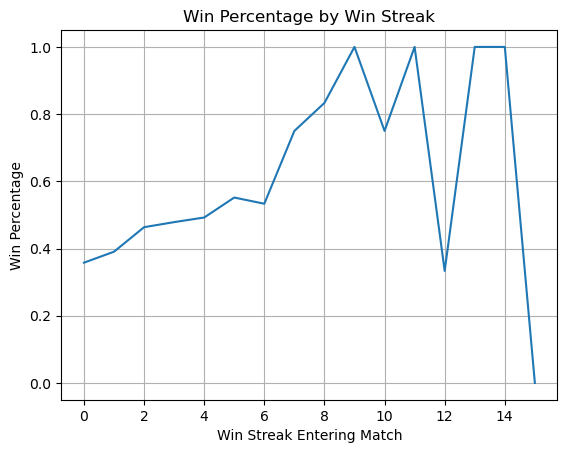

In [168]:
plt.plot(result_by_winstreak.index, result_by_winstreak['WinPercentage'])
plt.xlabel("Win Streak Entering Match")
plt.ylabel("Win Percentage")
plt.title("Win Percentage by Win Streak")
plt.grid(True)
plt.show()

We see a correlation, when winstreak is between 0 and 9, but then the win percentage is all over the place when the sample size is low

#### What if we got rid of data that didn't have a big enough sample size?

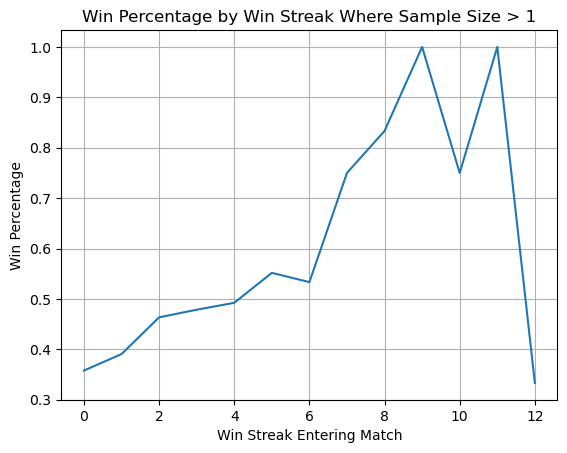

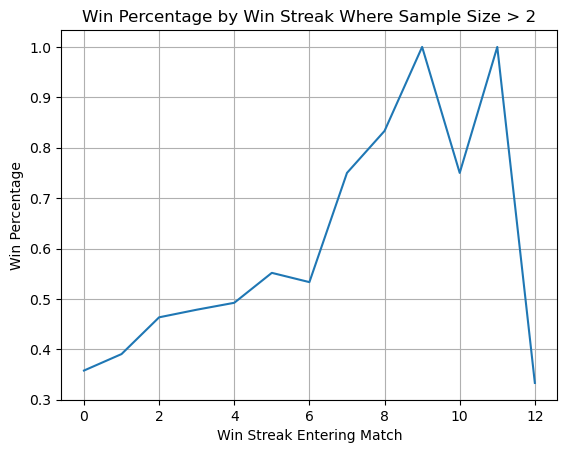

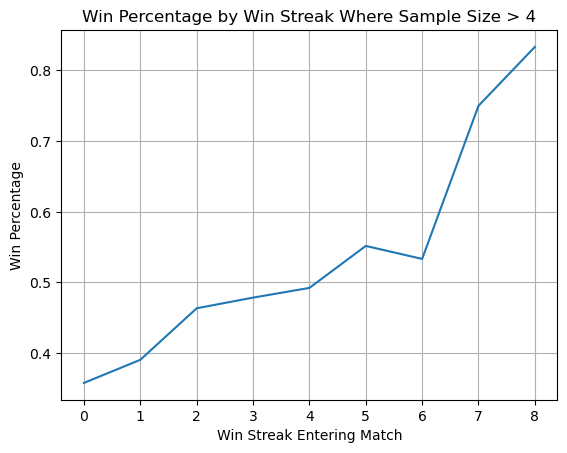

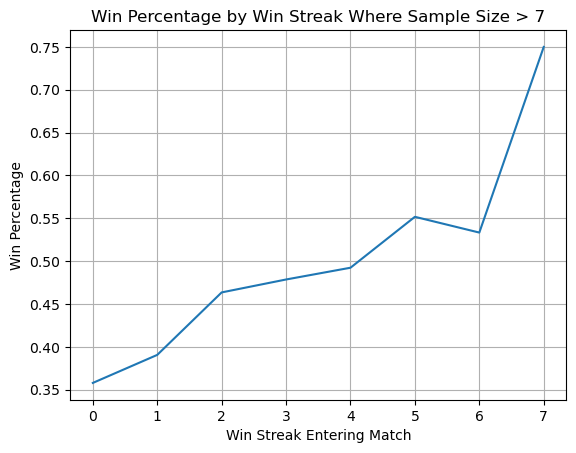

In [169]:
sample_size_mins = [2,3,5,8]
for num in sample_size_mins: 
    mask = result_by_winstreak['SampleSize'] >= num # requiring minimum samplesize
    reduced_data = result_by_winstreak[mask]
    plt.plot(reduced_data.index, reduced_data['WinPercentage'])
    plt.xlabel("Win Streak Entering Match")
    plt.ylabel("Win Percentage")
    plt.title("Win Percentage by Win Streak Where Sample Size > " + str(num-1))
    plt.grid(True)
    plt.show()

It is evident that there is a correlation between win percentage and win streak, when we required a minimum sample size. We get the best results when the minimum sample size is 4.

#### Using a minimum sample size of 4, lets add a linear regression line (using seaborn)

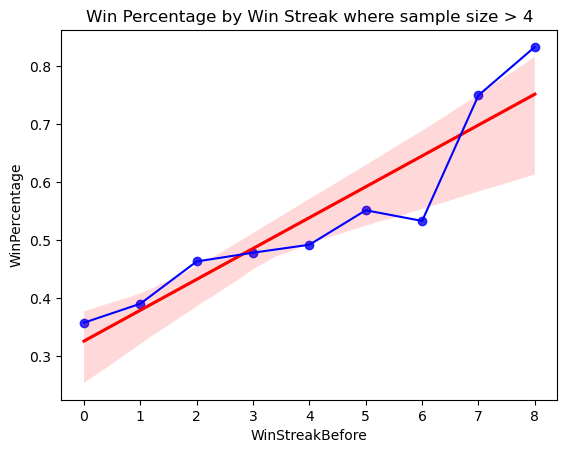

In [259]:
mask = result_by_winstreak['SampleSize'] > 4
reduced_data = result_by_winstreak[mask]
sns.regplot(x=reduced_data.index, y=reduced_data['WinPercentage'], color='blue', line_kws={"color": "red"})
plt.plot(reduced_data.index, reduced_data['WinPercentage'], color='blue')
plt.title("Win Percentage by Win Streak where sample size > 4")
plt.show()

We can see a clear correlation bwteen win streak and win percentage

In [261]:
# Calculating the slope, intercept, and r-value of the regression line
x = reduced_data.index.values
y = reduced_data['WinPercentage'].values

reg_line = linregress(x, y)

print('Slope:', reg_line.slope)
print('Intercept:', reg_line.intercept)
print('R-value:', reg_line.rvalue)

Slope: 0.05321681034153181
Intercept: 0.3261543207723514
R-value: 0.9270352434119623


This tells us that we can expect the win % to increase by about 5.3 % for each additional win in a team's win streak. There is a very strong correlation between WinStreakBefore and WinPercentage (an r-value of 0.927!)

### b) Let's look at all results based on winstreak

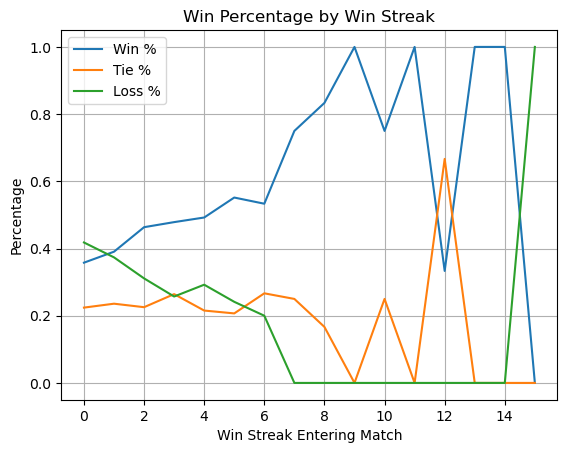

In [268]:
plt.plot(result_by_winstreak.index, result_by_winstreak['WinPercentage'], label = 'Win %')
plt.plot(result_by_winstreak.index, result_by_winstreak['TiePercentage'], label = 'Tie %')
plt.plot(result_by_winstreak.index, result_by_winstreak['LossPercentage'], label = 'Loss %')
plt.xlabel("Win Streak Entering Match")
plt.ylabel("Percentage")
plt.title("Win Percentage by Win Streak")
plt.grid(True)
plt.legend()
plt.show()

#### Let's get ride of data where the sample size is < 5

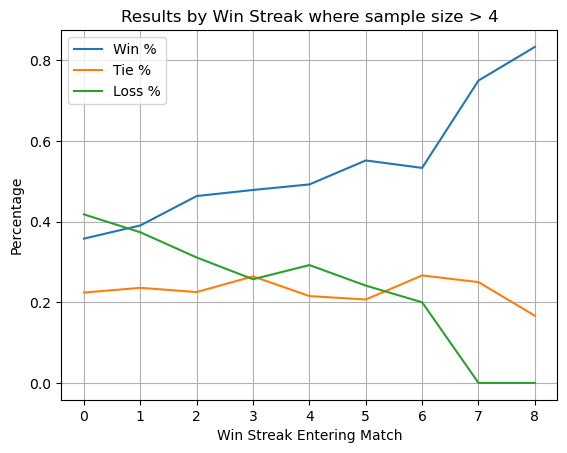

In [213]:
mask = result_by_winstreak['SampleSize'] >= 5
reduced_data = result_by_winstreak[mask]
plt.plot(reduced_data.index, reduced_data['WinPercentage'], label = 'Win %')
plt.plot(reduced_data.index, reduced_data['TiePercentage'], label = 'Tie %')
plt.plot(reduced_data.index, reduced_data['LossPercentage'], label = 'Loss %')
plt.xlabel("Win Streak Entering Match")
plt.ylabel("Percentage")
plt.title("Results by Win Streak where sample size > 4")
plt.grid(True)
plt.legend()
plt.show()

We can see that the win % increases as the win streak goes up, and the loss % decreases as the win streak goes up. The tie % doesn't seem to be affected

#### Adding Linear Regression Lines

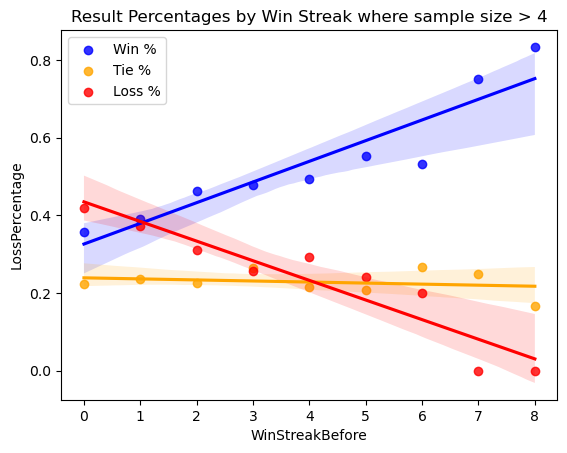

In [219]:
mask = result_by_winstreak['SampleSize'] > 4
reduced_data = result_by_winstreak[mask]
sns.regplot(x=reduced_data.index, y=reduced_data['WinPercentage'], color='blue', line_kws={'color': 'blue'}, label = 'Win %')
sns.regplot(x=reduced_data.index, y=reduced_data['TiePercentage'], color='orange', line_kws={'color': 'orange'}, label = 'Tie %')
sns.regplot(x=reduced_data.index, y=reduced_data['LossPercentage'], color='red', line_kws={'color': 'red'}, label = 'Loss %')
plt.title("Result Percentages by Win Streak where sample size > 4")
plt.legend()
plt.show()

In [262]:
# Calculating the slopem intercept, and r-value of the linear regression lines
x = reduced_data.index.values
reg_data = {'Win': reduced_data['WinPercentage'].values, 'Tie': reduced_data['TiePercentage'].values, 'Loss': reduced_data['LossPercentage'].values}
for name, y in reg_data.items():
    reg_line = linregress(x, y)
    print(name, "Slope:", reg_line.slope)
    print(name, "Intercept:", reg_line.intercept)
    print(name, "R-value:", reg_line.rvalue)

Win Slope: 0.05321681034153181
Win Intercept: 0.3261543207723514
Win R-value: 0.9270352434119623
Tie Slope: -0.0027018432589045113
Tie Intercept: 0.23916592753630095
Tie R-value: -0.23783340027895108
Loss Slope: -0.05051496708262731
Loss Intercept: 0.43467975169134765
Loss R-value: -0.9381973056484305


We see a strong positive correlation between win % and win streak, a strong negative correlation between loss % and win streak, and a week negative correlation between tie % and win streak

## 2. Does Unbeaten Streak Predict the Outcome of the next match?
 - Does this do a better or wose job of predicting the outcome of the next match than win streak?

In [236]:
# Creating dataframe of results by outbeaten to do analysis (adding unbeaten streak column also)
unbeaten_streaks = df.groupby('UnbeatenStreakBefore')
unbeaten_streak_counts = unbeaten_streaks.size()
result_by_unbeatenstreak = unbeaten_streak_counts.to_frame() # Transforming series of unbeaten streak counts to dataframe
result_by_unbeatenstreak.columns = ['SampleSize'] # Naming column
result_by_unbeatenstreak['WinPercentage'] = (df.groupby('UnbeatenStreakBefore')['Result'].apply(lambda x: (x == 'W').mean())) # Calculating WinPercentage by UnbeatenStreak
result_by_unbeatenstreak['TiePercentage'] = (df.groupby('UnbeatenStreakBefore')['Result'].apply(lambda x: (x == 'T').mean())) # Calculating TiePercentage by UnbeatenStreak
result_by_unbeatenstreak['LossPercentage'] = (df.groupby('UnbeatenStreakBefore')['Result'].apply(lambda x: (x == 'L').mean())) # Calculating LossPercentage by UnbeatenStreak
result_by_unbeatenstreak['UnbeatenPercentage'] = (df.groupby('UnbeatenStreakBefore')['Result'].apply(lambda x: (x != 'L').mean())) # Calculating LossPercentage by UnbeatenStreak

In [237]:
result_by_unbeatenstreak

,SampleSize,WinPercentage,TiePercentage,LossPercentage,UnbeatenPercentage
UnbeatenStreakBefore,,,,,
0,1522,0.339685,0.229304,0.431012,0.568988
1,847,0.363636,0.217237,0.419126,0.580874
2,483,0.387164,0.244306,0.368530,0.631470
3,300,0.430000,0.243333,0.326667,0.673333
4,194,0.443299,0.221649,0.335052,0.664948
5,126,0.444444,0.214286,0.341270,0.658730
6,79,0.506329,0.215190,0.278481,0.721519
7,56,0.571429,0.196429,0.232143,0.767857
8,43,0.581395,0.209302,0.209302,0.790698


### a) Looking at just unbeaten percentage by unbeatenstreak
- Unbeaten means either tieing or winning (ie not losing)

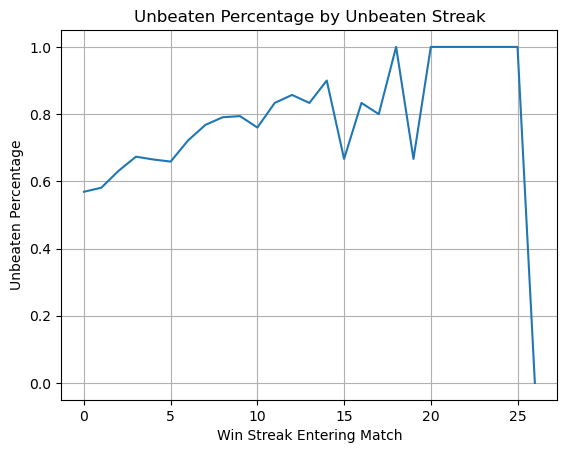

In [239]:
plt.plot(result_by_unbeatenstreak.index, result_by_unbeatenstreak['UnbeatenPercentage'])
plt.xlabel("Win Streak Entering Match")
plt.ylabel("Unbeaten Percentage")
plt.title("Unbeaten Percentage by Unbeaten Streak")
plt.grid(True)
plt.show()

#### Let's require a sample size > 4 like we did in Question 1

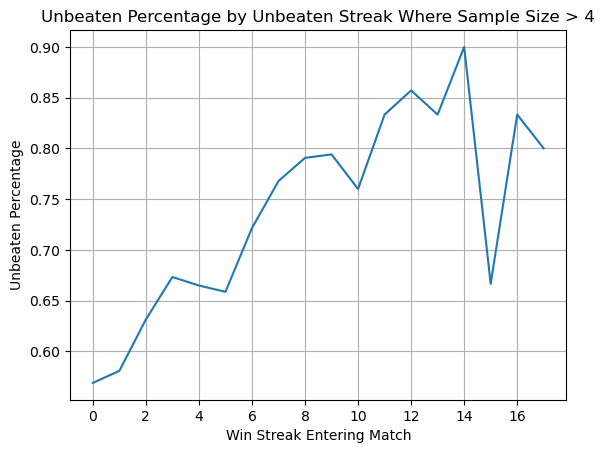

In [245]:
mask = result_by_unbeatenstreak['SampleSize'] > 4
reduced_data = result_by_unbeatenstreak[mask]
plt.plot(reduced_data.index, reduced_data['UnbeatenPercentage'])
plt.xlabel("Win Streak Entering Match")
plt.ylabel("Unbeaten Percentage")
plt.title("Unbeaten Percentage by Unbeaten Streak Where Sample Size > 4")
plt.grid(True)
plt.xticks(range(0, 17, 2)) # Changing What x tick marks count by
plt.show()

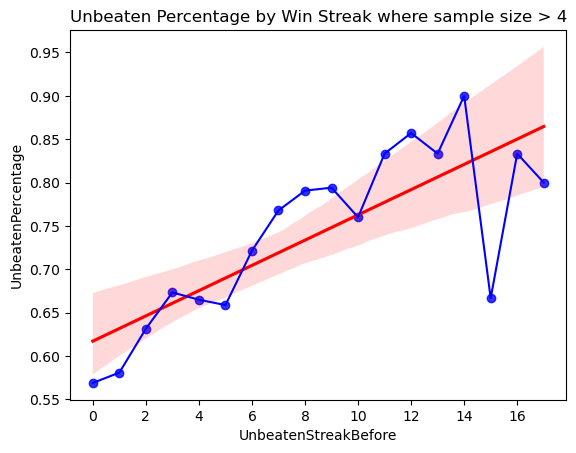

In [264]:
mask = result_by_unbeatenstreak['SampleSize'] > 4
reduced_data = result_by_unbeatenstreak[mask]
sns.regplot(x=reduced_data.index, y=reduced_data['UnbeatenPercentage'], color='blue', line_kws={"color": "red"})
plt.plot(reduced_data.index, reduced_data['UnbeatenPercentage'], color='blue')
plt.title("Unbeaten Percentage by Win Streak where sample size > 4")
plt.xticks(range(0, 17, 2))
plt.show()

In [265]:
# Calculating the slope, intercept, and r-value of the linear regression line
x = reduced_data.index.values
y = reduced_data['UnbeatenPercentage'].values

reg_line = linregress(x, y)

print('Slope:', reg_line.slope)
print('Intercept:', reg_line.intercept)
print('R-value:', reg_line.rvalue)

Slope: 0.014559607145613331
Intercept: 0.617151380689643
R-value: 0.7902481110590761


We see a positve correlation netween unbeaten streak and unbeaten percentage. Although, this is not as strong as the correlation between win streak and win percentage.

### b) Let's look at all results based on winstreak

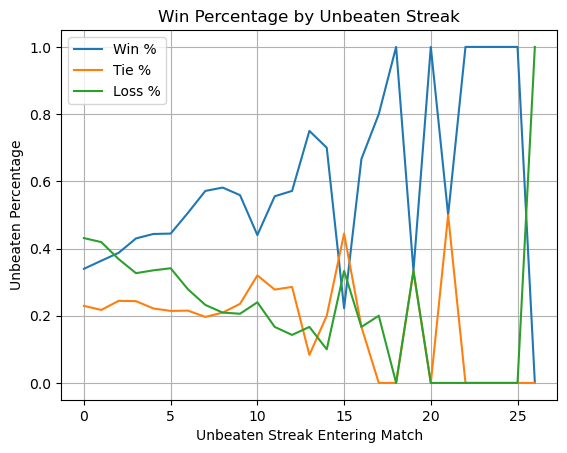

In [271]:
plt.plot(result_by_unbeatenstreak.index, result_by_unbeatenstreak['WinPercentage'], label = 'Win %')
plt.plot(result_by_unbeatenstreak.index, result_by_unbeatenstreak['TiePercentage'], label = 'Tie %')
plt.plot(result_by_unbeatenstreak.index, result_by_unbeatenstreak['LossPercentage'], label = 'Loss %')
plt.xlabel("Unbeaten Streak Entering Match")
plt.ylabel("Unbeaten Percentage")
plt.title("Win Percentage by Unbeaten Streak")
plt.grid(True)
plt.legend()
plt.show()

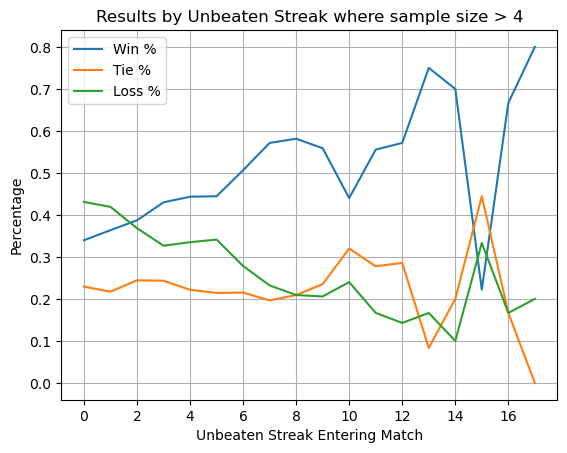

In [275]:
mask = result_by_unbeatenstreak['SampleSize'] >= 5
reduced_data = result_by_unbeatenstreak[mask]
plt.plot(reduced_data.index, reduced_data['WinPercentage'], label = 'Win %')
plt.plot(reduced_data.index, reduced_data['TiePercentage'], label = 'Tie %')
plt.plot(reduced_data.index, reduced_data['LossPercentage'], label = 'Loss %')
plt.xlabel("Unbeaten Streak Entering Match")
plt.ylabel("Percentage")
plt.title("Results by Unbeaten Streak where sample size > 4")
plt.grid(True)
plt.legend()
plt.xticks(range(0, 18, 2))
plt.show()

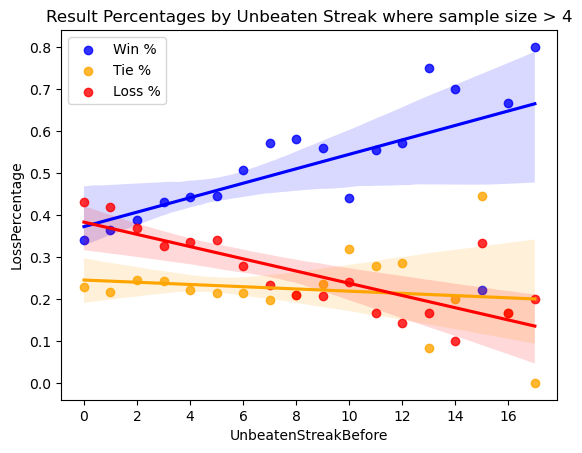

In [276]:
mask = result_by_unbeatenstreak['SampleSize'] > 4
reduced_data = result_by_unbeatenstreak[mask]
sns.regplot(x=reduced_data.index, y=reduced_data['WinPercentage'], color='blue', line_kws={'color': 'blue'}, label = 'Win %')
sns.regplot(x=reduced_data.index, y=reduced_data['TiePercentage'], color='orange', line_kws={'color': 'orange'}, label = 'Tie %')
sns.regplot(x=reduced_data.index, y=reduced_data['LossPercentage'], color='red', line_kws={'color': 'red'}, label = 'Loss %')
plt.title("Result Percentages by Unbeaten Streak where sample size > 4")
plt.xticks(range(0, 18, 2))
plt.legend()
plt.show()

In [274]:
# Calculating the slopem intercept, and r-value of the linear regression lines
x = reduced_data.index.values
reg_data = {'Win': reduced_data['WinPercentage'].values, 'Tie': reduced_data['TiePercentage'].values, 'Loss': reduced_data['LossPercentage'].values}
for name, y in reg_data.items():
    reg_line = linregress(x, y)
    print(name, "Slope:", reg_line.slope)
    print(name, "Intercept:", reg_line.intercept)
    print(name, "R-value:", reg_line.rvalue)

Win Slope: 0.01720851532369062
Win Intercept: 0.372176372148461
Win R-value: 0.609232849825027
Tie Slope: -0.0026489081780772922
Tie Intercept: 0.2449750085411821
Tie R-value: -0.15558678058044428
Loss Slope: -0.014559607145613331
Loss Intercept: 0.38284861931035696
Loss R-value: -0.790248111059076


We see a strong negative correlation between unbeaten streak and loss %, but unbeaten streak and win % and unbeaten streak and tie % have week correlations.

## 3. Is win streak or unbeaten streak a better predictor?

In [277]:
# Plot graphs from 1 and 2 above beside each other

## 4. Does Points earned in the last n matches predict points earned in the next match (or next n matches)?

## 5. Does a team’s recent goal differential correlate with goal differential in the next match?

## 6. Does a team’s recent goal differential correlate with win probability and/or points earned in the next match?

## 7. Does the effect of momentum differ for ‘big’ clubs vs ‘small’ clubs?

In the premier league Arsenal, Manchester City, Manchester United, Liverpool, Chelsea, and Tottenham (Spurs) are reffered to as the Big 6 because they have the most funding. We will refer to these 6 teams as 'big' clubs.

## 8. Is positive or negative momentum more predictive?

## 9. Does whether a team is home or away change the effect of momentum?

## 10. Which teams have the biggest swings in form?

## 11. How frequent are hot streaks (winning/unbeaten streaks) and cold streaks (losing streaks)?